# Load and preprocess the data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'dataset_12345678.csv' with the actual name of your dataset file
data = pd.read_csv('_ 22049314.csv')

# Display the first few rows of the dataset to check if it loaded correctly
print(data.head())


   order_id          order_date   sku      color      size  unit_price  \
0         1   2022/6/1 16:05:00   708  Dark Blue       2XL         298   
1         1   2022/6/1 16:05:00    89  Dark Blue       2XL         258   
2         2  2022/6/10 17:03:00  bobo      Cream  One Size         228   
3         3  2022/6/10 19:59:00   799  Dark Blue        XL         264   
4         4  2022/6/11 11:42:00   799  Dark Blue         M         264   

   quantity  revenue  
0         1      298  
1         1      258  
2         1      228  
3         1      264  
4         1      264  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


In [4]:
data.describe()

,order_id,unit_price,quantity,revenue
count,527.000000,527.000000,527.000000,527.000000
mean,115.313093,274.973435,1.011385,278.024668
std,73.106716,34.517412,0.106193,44.741095
min,1.000000,191.000000,1.000000,191.000000
25%,54.000000,266.000000,1.000000,266.000000
50%,110.000000,278.000000,1.000000,278.000000
75%,166.000000,288.000000,1.000000,288.000000
max,273.000000,899.000000,2.000000,899.000000


In [5]:
data['size'].fillna(data['size'].mode()[0], inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        527 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


# 1. Calculate Total Revenue Per Order:
What is the total revenue per order?

In [10]:
# Assuming your dataset is named 'data'
total_revenue_per_order = data.groupby('order_id')['revenue'].sum()

# Displaying the total revenue per order
print(total_revenue_per_order)

# Find the order_id with the highest total revenue per order
order_id_max_revenue = total_revenue_per_order.idxmax()

# Print the order_id with the highest total revenue per order
print("Order ID with the highest total revenue per order:", order_id_max_revenue)

# Find the highest total revenue per order value
max_revenue_per_order = total_revenue_per_order.max()

# Print the highest total revenue per order value
print("Highest total revenue per order:", max_revenue_per_order)


order_id
1      754
2      473
3      542
4      542
5      542
      ... 
269    564
270    278
271    278
272    278
273    278
Name: revenue, Length: 273, dtype: int64
Order ID with the highest total revenue per order: 134
Highest total revenue per order: 3914


# 2. Find the Most Popular Colour:
Determine which colour has the highest number of items sold

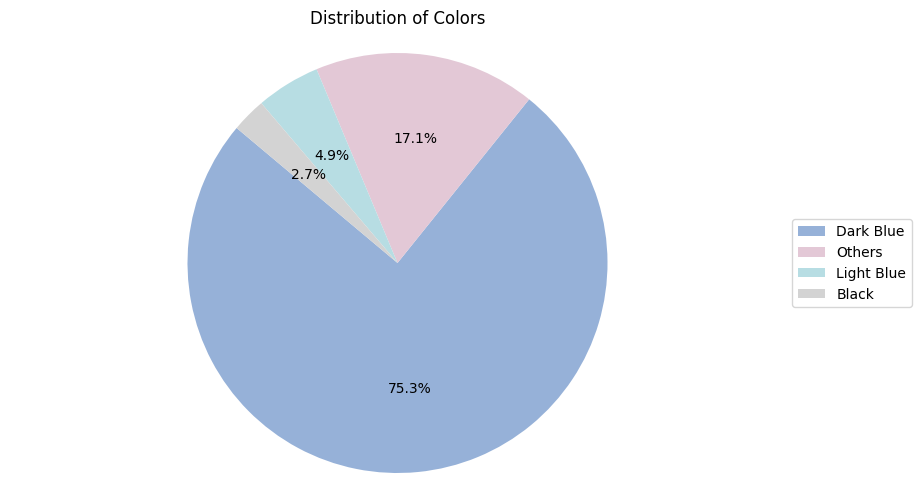

In [11]:
#Calculate Counts and Percentages
counts = data['color'].value_counts()
percentages = counts / counts.sum() * 100

#Define Color Mapping
color_mapping = {
    'Dark Blue': '#96b1d8',
    'Light Blue': '#b7dde3',
    'Black': '#d3d3d3',
}

#Create a New Column 'colors_grouped
data['colors_grouped'] = data['color'].apply(lambda x: x if percentages[x] >= 2 else 'Others')

#Calculate Grouped Counts and Percentages
grouped_counts = data['colors_grouped'].value_counts()
grouped_percentages = grouped_counts / grouped_counts.sum() * 100

#Create a Pie Chart
colors = [color_mapping.get(color, '#e3c8d6') for color in grouped_percentages.index]
plt.figure(figsize=(10, 6))
plt.pie(grouped_percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)

#Display the Chart with Legend
plt.axis('equal')
plt.legend(grouped_percentages.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Colors')
plt.show()

# 3. Average Revenue Per Size:
Calculate the average revenue generated from sales for each size category

size
2XL         288.883721
3XL         282.525000
4XL         356.111111
L           278.703297
M           279.945652
One SIze    198.000000
One Size    262.066667
S           227.000000
XL          275.940299
Name: revenue, dtype: float64


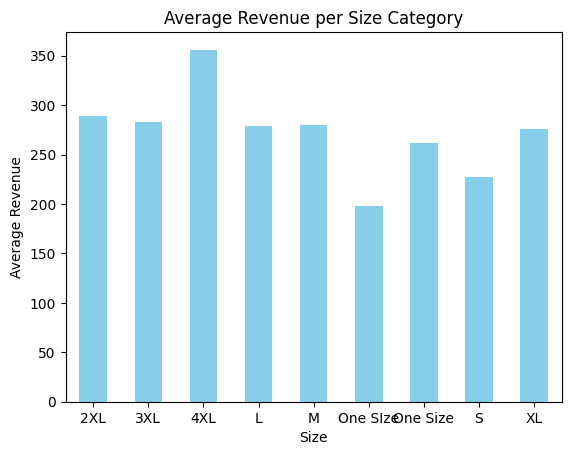

In [13]:
# Calculate the average revenue per size category
average_revenue_per_size = data.groupby('size')['revenue'].mean()

# Display the average revenue per size category
print(average_revenue_per_size)

# Plotting the average revenue per size category
average_revenue_per_size.plot(kind='bar', color='skyblue')
plt.xlabel('Size')
plt.ylabel('Average Revenue')
plt.title('Average Revenue per Size Category')
plt.xticks(rotation=0)
plt.show()

# 4. SKU Performance Analysis:
For each SKU, calculate the total revenue and the total quantity sold

In [14]:
# Calculate total revenue and total quantity sold for each SKU
sku_performance = data.groupby('sku').agg({'revenue': 'sum', 'quantity': 'sum'}).reset_index()

# Display SKU performance
print(sku_performance)

      sku  revenue  quantity
0     127      714         3
1    1499      574         2
2    1719     2052         8
3     218     2204         7
4     229      414         2
5     239     4199        16
6    2499      962         4
7      29      227         1
8    3081      990         5
9     339     1084         4
10   3799     2390         9
11    439      258         1
12    539      536         2
13  61399     1112         4
14    628      268         1
15    708    29146        99
16     77     4055        16
17     79     2817         9
18    799    79182       287
19   8499      699         3
20     89     3341        13
21    897      804         3
22   9699     4896        17
23   bobo     3595        17


This code above groups the data by the SKU column and then calculates the sum of the revenue and quantity columns for each SKU. The result is a dataframe showing the total revenue and total quantity sold for each SKU.

# 5. Monthly Sales Report:
Generate a monthly sales report that includes the total number of orders, total revenue,
and average order value.

In [16]:
# Convert the order_date column to datetime format
data['order_date'] = pd.to_datetime(data['order_date'])

# Extract the month from the order_date column
data['month'] = data['order_date'].dt.month

# Group the data by month
monthly_sales_report = data.groupby('month').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue', 'sum'),
    average_order_value=('revenue', 'mean')
)

# Display the monthly sales report
print(monthly_sales_report)


       total_orders  total_revenue  average_order_value
month                                                  
6                74          25259           268.712766
7               105          32175           282.236842
8               131          42513           276.058442
9               138          46572           282.254545


In [23]:
import calendar

# Convert the order_date column to datetime format
data['order_date'] = pd.to_datetime(data['order_date'])

# Extract the month from the order_date column
data['month'] = data['order_date'].dt.month

# Group the data by month
monthly_sales_report = data.groupby('month').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue', 'sum'),
    average_order_value=('revenue', 'mean')
)

# Map month numbers to month names
monthly_sales_report['month'] = monthly_sales_report.index.map(lambda x: calendar.month_abbr[x])

# Display the updated monthly sales report
print(monthly_sales_report)


       total_orders  total_revenue  average_order_value month
month                                                        
6                74          25259           268.712766   Jun
7               105          32175           282.236842   Jul
8               131          42513           276.058442   Aug
9               138          46572           282.254545   Sep


# 6. Visualize Revenue Trends Over Time:
Create a line chart that shows the monthly revenue trends over the time period covered
by the dataset.

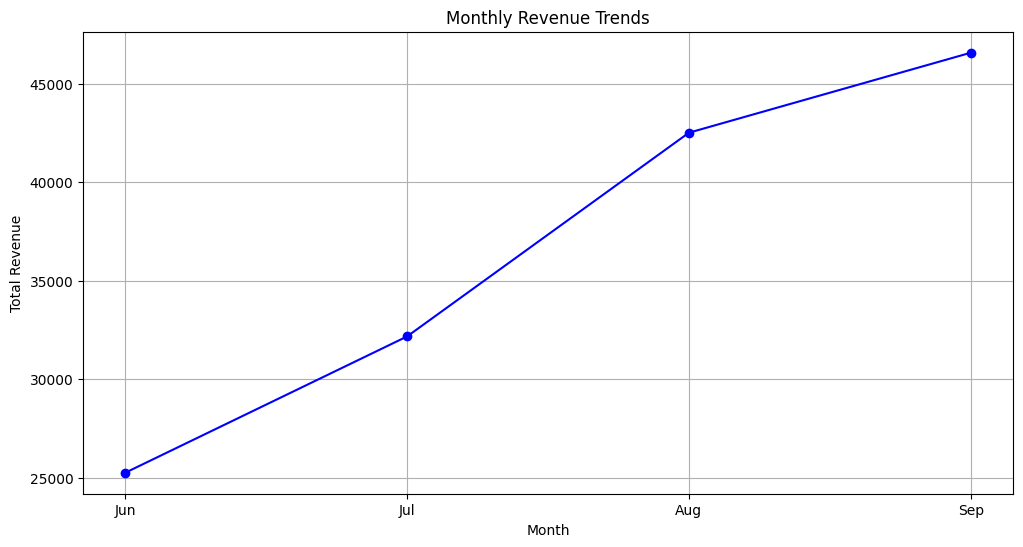

In [24]:
# Import the necessary library
import calendar

# Group the data by month and calculate total revenue
monthly_revenue = data.groupby('month')['revenue'].sum()

# Convert month numbers to month names
month_names = [calendar.month_abbr[m] for m in monthly_revenue.index]

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_revenue.values, marker='o', color='b', linestyle='-')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()
